In [1]:
import sys
sys.path.insert(0, "C:/Users/Imaris/Desktop/Chloe_analysis/Chloe_Chromosome_detection/utils")

In [2]:
from chromosome_dsb import *

In [3]:
# Ignore warnings in notebook
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [5]:
import numpy as np
import javabridge
import bioformats
from sklearn.externals import joblib
import os

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 8,8
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [7]:
path = "C:/Users/Imaris/Desktop/Chloe_analysis/data/cku-exo1_002/"

In [8]:
javabridge.start_vm(class_path=bioformats.JARS)

In [9]:
position, time_point = load_data.stage_position(path)
skelete = load_data.skeleton_coord(position,time_point)

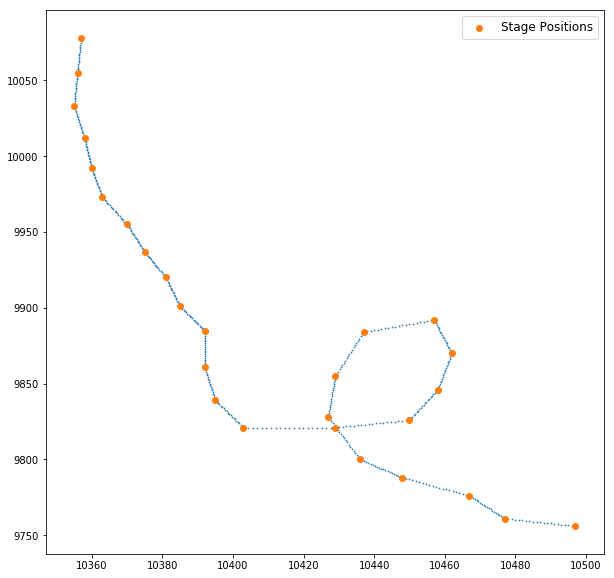

In [10]:
data = np.concatenate((position,time_point[:, np.newaxis]), axis=1)
sort_data = data[np.argsort(data[:,2])]

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.scatter(skelete[:,0], skelete[:,1], s=0.5)
stage_pos = ax.scatter(sort_data[:,0], sort_data[:,1])
plt.legend([stage_pos], ["Stage Positions"], loc=0,fontsize='large')

In [20]:
parameters = {
# Size kernel for background substraction, should be a little larger than the object of interest
'back_sub_ch1' : 5,
'back_sub_ch2' : 5,
'back_sub_ch3' : 20,
# LOCI detection:
# Smallest object (in pixels) to be detected
'smaller' : 1,
# Largest object to be detected
'largest' : 5,
# Threshold above which to look for
'thresh' : 80        
}

In [12]:
clf = joblib.load("C:/Users/Imaris/Desktop/Chloe_analysis/Chloe_Chromosome_detection/clf_scaler/clf")
scaler = joblib.load("C:/Users/Imaris/Desktop/Chloe_analysis/Chloe_Chromosome_detection/clf_scaler/scaler")

working on C:/Users/Imaris/Desktop/Chloe_analysis/data/cku-exo1_002/2017-04-12_RAD51-HTP3_cku80-exo1_002_visit_10_D3D_ALX.dv


KeyboardInterrupt: 

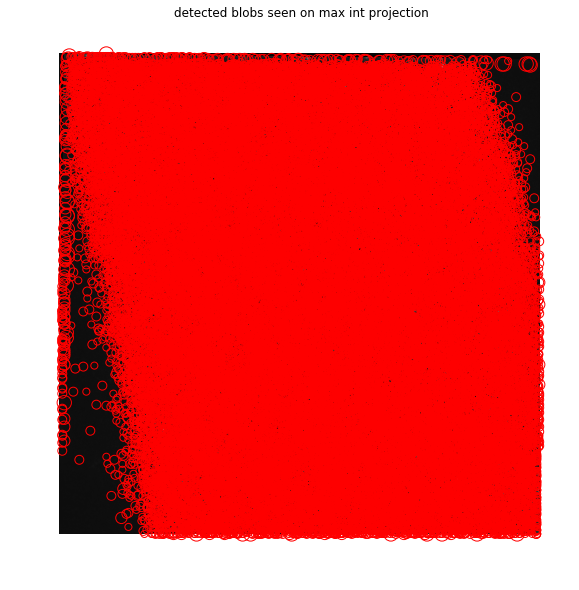

In [27]:
batch.batch_analysis(path, clf, scaler, parameters=parameters)